In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tqdm.notebook import tqdm
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
# Define the file path
file_path = "C:/Users/HP/Downloads/66e31d6ee96cd_student_resource_3/student_resource 3/dataset/train.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Show the first few rows of the dataframe to understand its structure
brief_data=df.iloc[:,0]
brief_data

0         https://m.media-amazon.com/images/I/61I9XdN6OF...
1         https://m.media-amazon.com/images/I/71gSRbyXmo...
2         https://m.media-amazon.com/images/I/61BZ4zrjZX...
3         https://m.media-amazon.com/images/I/612mrlqiI4...
4         https://m.media-amazon.com/images/I/617Tl40LOX...
                                ...                        
263854    https://m.media-amazon.com/images/I/612J1R1xHl...
263855    https://m.media-amazon.com/images/I/61Blzh2+28...
263856    https://m.media-amazon.com/images/I/51MsegDL9V...
263857    https://m.media-amazon.com/images/I/510KhVw4VS...
263858    https://m.media-amazon.com/images/I/51lzTNLQ-6...
Name: image_link, Length: 263859, dtype: object

In [24]:
import easyocr

reader= easyocr.Reader(['en','fr','es','de'],gpu=False)

Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.loa

In [25]:
results=reader.readtext(brief_data[1])
results

Progress: |███████████████████████████████████████████████████| 102.2% Complete

[([[321, 61], [581, 61], [581, 79], [321, 79]], '<s', 0.06085820907460365),
 ([[343, 85], [431, 85], [431, 99], [343, 99]], '6 €z', 0.1362045234683005),
 ([[503, 105], [589, 105], [589, 123], [503, 123]],
  'aee',
  0.0035599356915786105),
 ([[329, 237], [568, 237], [568, 353], [329, 353]],
  'RRIFIC!',
  0.8155710411246785),
 ([[841, 341], [1153, 341], [1153, 383], [841, 383]],
  'LEBENSMITTELECHT',
  0.9983377416610436),
 ([[247, 431], [309, 431], [309, 473], [247, 473]],
  'Cwg',
  0.21809155896135812),
 ([[258, 452], [320, 452], [320, 502], [258, 502]], 'DAY', 0.9520879983901978),
 ([[902, 708], [1094, 708], [1094, 758], [902, 758]],
  'GEPRÄGTES',
  0.9978185072641752),
 ([[937, 761], [1059, 761], [1059, 803], [937, 803]],
  'DESIGN',
  0.9997355843934502),
 ([[436, 906], [574, 906], [574, 954], [436, 954]],
  'As YoU L[KE',
  0.3623491873723443),
 ([[619, 899], [681, 899], [681, 940], [619, 940]],
  'BEST',
  0.8217095136642456),
 ([[898, 920], [1093, 920], [1093, 958], [898, 958

In [27]:
pd.DataFrame(results,columns=['bbox','text','conf'])

,bbox,text,conf
0,"[[321, 61], [581, 61], [581, 79], [321, 79]]",<s,0.060858
1,"[[343, 85], [431, 85], [431, 99], [343, 99]]",6 €z,0.136205
2,"[[503, 105], [589, 105], [589, 123], [503, 123]]",aee,0.003560
3,"[[329, 237], [568, 237], [568, 353], [329, 353]]",RRIFIC!,0.815571
4,"[[841, 341], [1153, 341], [1153, 383], [841, 3...",LEBENSMITTELECHT,0.998338
5,"[[247, 431], [309, 431], [309, 473], [247, 473]]",Cwg,0.218092
6,"[[258, 452], [320, 452], [320, 502], [258, 502]]",DAY,0.952088
7,"[[902, 708], [1094, 708], [1094, 758], [902, 7...",GEPRÄGTES,0.997819
8,"[[937, 761], [1059, 761], [1059, 803], [937, 8...",DESIGN,0.999736
9,"[[436, 906], [574, 906], [574, 954], [436, 954]]",As YoU L[KE,0.362349


In [12]:
import keras_ocr

pipeline=keras_ocr.pipeline.Pipeline()

Looking for C:\Users\HP\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\HP\.keras-ocr\crnn_kurapan.h5


In [15]:
results1=pipeline.recognize([brief_data[1]])

1/1 [==============================] - 5s 5s/step


In [17]:
pd.DataFrame(results1[0],columns=['text','bbox'])

,text,bbox
0,,"[[283.52927, 62.013668], [581.22144, 60.386944..."
1,,"[[453.55862, 91.15897], [504.0804, 92.68995], ..."
2,s,"[[529.49634, 112.62356], [589.3517, 110.62839]..."
3,rs,"[[515.625, 116.015625], [529.6875, 116.015625]..."
4,rrific,"[[340.77386, 261.58176], [553.2536, 249.17418]..."
5,ntea,"[[184.18744, 287.57474], [329.65646, 255.951],..."
6,lebensmittelecht,"[[846.09375, 344.53125], [1150.7812, 344.53125..."
7,cup,"[[247.26562, 434.76562], [304.6875, 434.76562]..."
8,s,"[[235.54688, 450.0], [255.46875, 450.0], [255...."
9,day,"[[257.42026, 472.88583], [311.1235, 454.3675],..."


In [19]:
keras_ocr.tools.drawAnnotations(plt.imread(brief_data[1]), results1[0])

ValueError: Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.

Looking for C:\Users\HP\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\HP\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 7s 7s/step


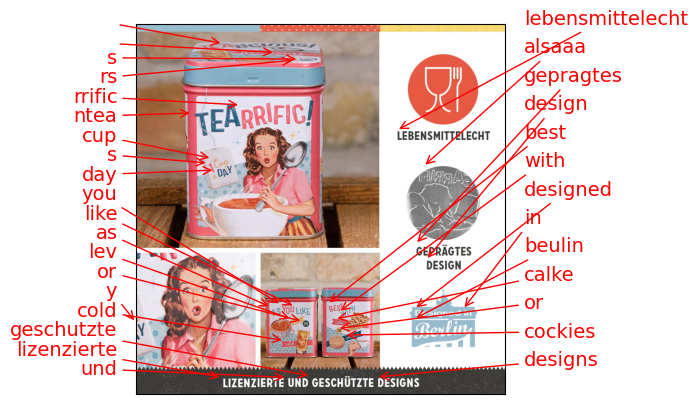

In [21]:
import keras_ocr
import matplotlib.pyplot as plt

# Create a pipeline for OCR
pipeline = keras_ocr.pipeline.Pipeline()

# Load your image
image = plt.imread("C:/Users/HP/Downloads/71gSRbyXmoL.jpg")

# Run OCR pipeline
results = pipeline.recognize([image])

# Draw annotations
keras_ocr.tools.drawAnnotations(image, results1[0])

# Display the image with annotations
plt.imshow(image)
plt.show()